<a href="https://colab.research.google.com/github/CuTyche/Netflix-data-analysis/blob/main/Netflix_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [13]:
##Loading the data in the dataset
df = pd.read_csv('netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [16]:
##Cleaning the data
df['director'].fillna("Unknown",inplace = True)
df['cast'].fillna('No cast info', inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['duration'].fillna(df['duration'].mode()[0],inplace=True)

/tmp/ipython-input-16-964490622.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0],inplace=True)
/tmp/ipython-input-16-964490622.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [17]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [18]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4529
cast,7693
country,748
date_added,1767
release_year,74
rating,17
duration,220


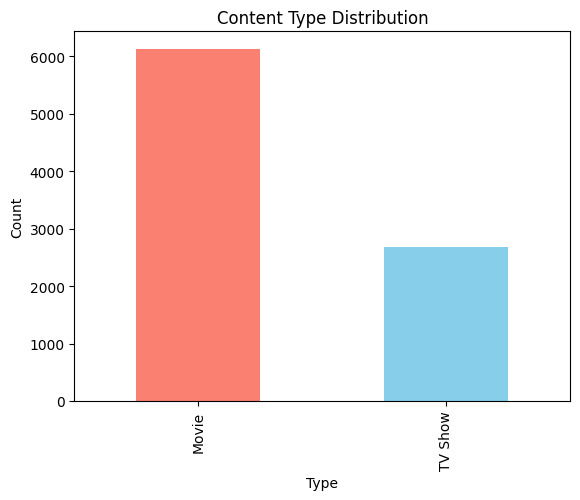

In [19]:
## What is the most common type of content? (Movie or TV Show?)
df['type'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

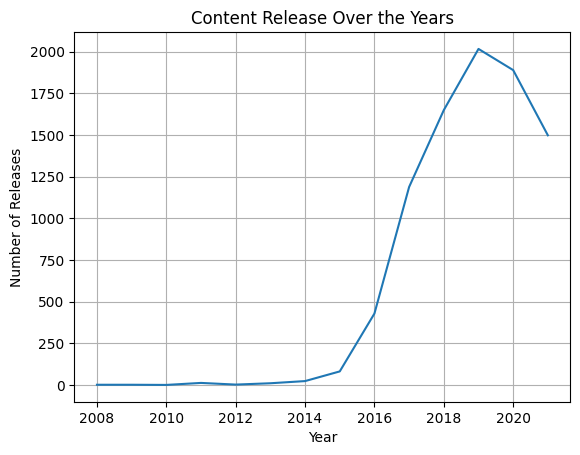

In [21]:
## How has Netflix's content production grown over time?
df['release_year'] = pd.DatetimeIndex(df['date_added']).year
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Content Release Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid()
plt.show()

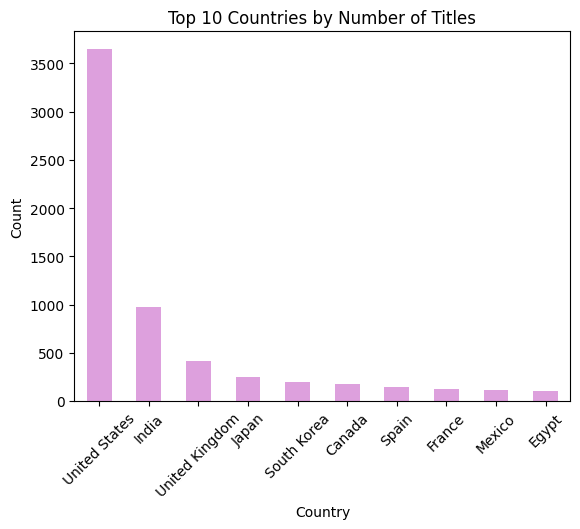

In [23]:
## What countries dominate the Netflix catalog?
df['country'].value_counts().head(10).plot(kind='bar', color='plum')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

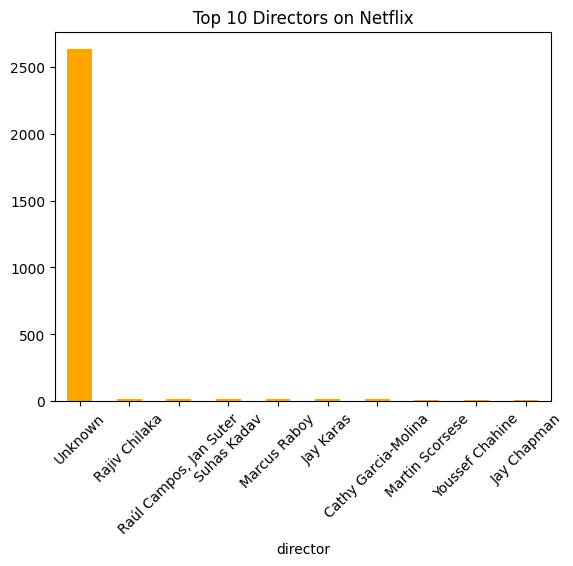

In [26]:
## Who are the most featured directors or actors?
df['director'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Directors on Netflix')
plt.xticks(rotation=45)
plt.show()

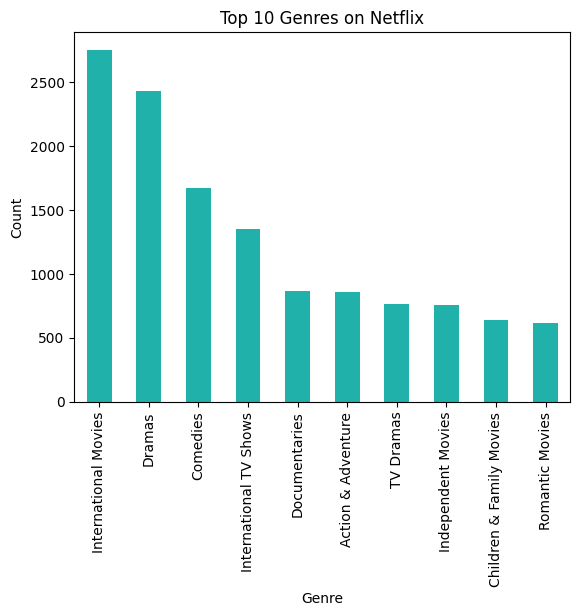

In [27]:
## What are the most frequent genres?
df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## **Summary**


*   Netflix’s content library is dominated by movies (70%) with most releases coming after 2017, showing rapid growth.
*   The U.S. leads in content contribution, but Indian and USA content are also significant.
*   Drama and International movies dominate genres, showing a global appeal.
*   Most of the directors are unknown.




